# **회귀**



회귀는 입력에 대해 연속적인 값을 대응시키는 문제이며, 분류는 입력에 대해 순서가 없는 클래스(라벨)를 대응시키는 문제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(1) #난수 고정
X_min = 4
X_max = 30
X_n = 16
X = 5+25*np.random.rand(X_n)
Prm_c=[170, 108, 0.2]
T= Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2] * X) +4* np. random.randn(X_n) # (A)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (B)

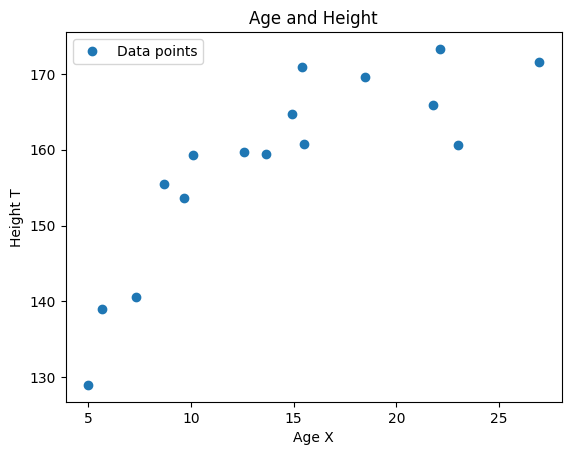

In [ ]:

# 저장된 파일 로드
data = np.load('ch5_data.npz')

X = data['X']
T = data['T']

plt.plot(X, T, 'o', label='Data points')
plt.title('Age and Height')
plt.xlabel('Age X')
plt.ylabel('Height T')
plt.legend()
plt.show()


In [ ]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [ ]:
print(np.round(X, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [ ]:
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


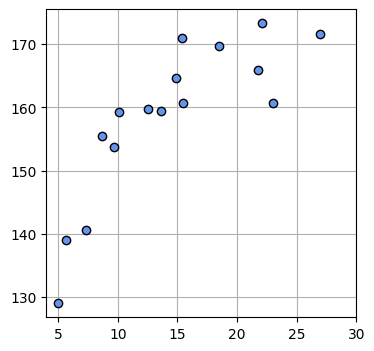

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker = 'o', linestyle = 'None', markeredgecolor = 'black', color = 'cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

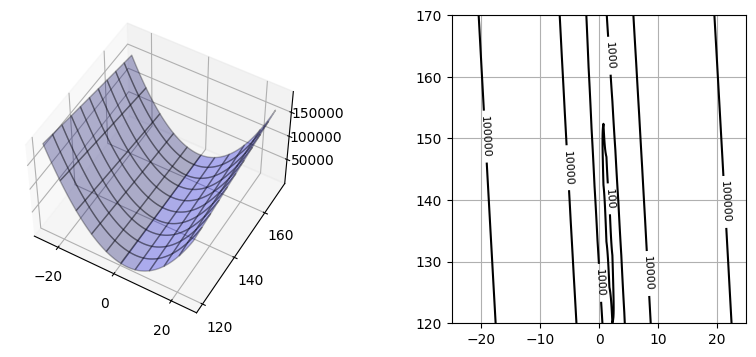

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x, t, w):
  y = w[0]*x+ w[1]
  mse = np.mean((y-t)**2)
  return mse

# 계산
xn = 100 # 등고선표시해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J= np. zeros((len(x0), len(x1)))


for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax=plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue'
, edgecolor='black') # row 간격은 10 column 간격은 10, alpha 즉 투명도는 0.3, 그래프의 전체적인 색깔은 파랑, 그래프의 엣지컬러는 검정색
ax.set_xticks([-20, 0, 20]) #x축에 적을 간격
ax.set_yticks([120, 140, 160]) # y축에 적을 간격
ax.view_init(50, -60) #3차원 바라보는 관점 정하기
plt.subplot(1, 2, 2) # 이제 1x2 중 2번째 서브플롯으로 이동
cont=plt.contour(xx0, xx1, J, 30, colors='black', levels=[100, 1000, 10000, 100000]) #levels: 등고선 레벨 정하기
cont.clabel(fmt='%1.0f', fontsize=8)   # 텍스트 포맷은 정수형으로 하고 폰트크기는 8로 해서 등고선의 레벨을 그래프에 추가
plt.grid(True) # 격자 생성
plt.show()

In [ ]:
def dmse_line(x, t, w):
  y = w[0]*x +w[1]
  d_w0 = 2*np.mean((y-t)*x)
  d_w1 = 2*np.mean(y-t)
  return d_w0, d_w1

d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


반복횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


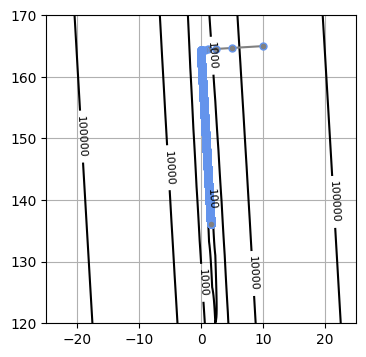

In [ ]:
def fit_line_num(x, t):
  w_init = [10.0, 165.0]
  alpha = 0.001 # lr
  iter_max = 100000
  eps = 0.1
  w_i = np.zeros([iter_max, 2])
  w_i[0,:] = w_init
  for i in range(1,iter_max):
    dmse = dmse_line(x, t, w_i[i-1])
    w_i[i, 0] = w_i[i-1, 0]-alpha*dmse[0]
    w_i[i, 1] = w_i[i-1, 1]- alpha*dmse[1]
    if max(np.absolute(dmse))<eps:
      break
  w0 = w_i[i, 0]
  w1 = w_i[i, 1]
  w_i = w_i[:i, :]
  return w0, w1,dmse, w_i


# 메인
plt.figure(figsize=(4, 4))#MSE의등고선표시
xn= 100 # 등고선해상도
wO_range= [-25, 25]
w1_range = [120, 170]
x0 =np.linspace(w0_range[0], w0_range[1], xn)
x1 =np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 =np.meshgrid(x0, x1)
J =  np.zeros((len(x0), len(x1)))
for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] =mse_line(X, T, (x0[i0], x1[i1]))

cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
W0, W1, dMSE, W_history = fit_line_num(X, T)
print('반복횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()




In [ ]:
def show_line(w):
  xb =np.linspace(X_min, X_max, 100)
  y = w[0] * xb + w[1]
  plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

wo=1.540, w1=136.176
SD=7.002 cm


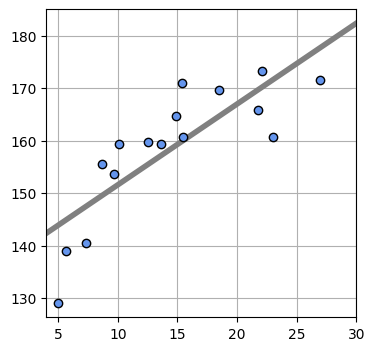

In [ ]:
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse =mse_line(X, T, W)
print("wo={0:.3f}, w1={1:.3f}".format(W0, W1))
print("SD={0:.3f} cm". format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker = 'o', linestyle = 'None', color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


# 몸무게도 이용하여 나이 구하기!!

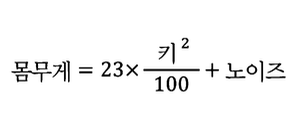

In [ ]:
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1)
X1 = 23*(T/ 100)**2 + 2*np.random.randn(X_n)
X1_min = 40
X1_max= 75

In [ ]:
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


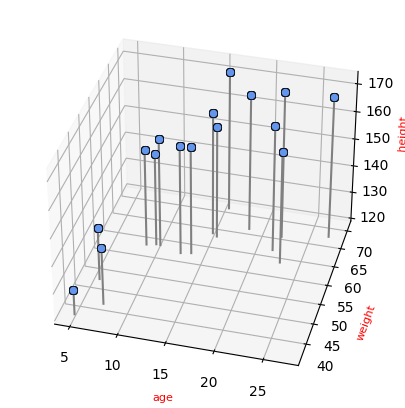

In [ ]:
def show_data2(ax, x0, x1, t):
  for i in range(len(x0)):
    ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color='gray')
    ax.plot(x0, x1, t, 'o', color='cornflowerblue', markeredgecolor='black', markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35, azim=-75)


plt.figure(figsize=(6, 5))
ax =plt.subplot(1,1,1,projection='3d')
ax.set_xlabel("age", size = 8, color = "r")
ax.set_ylabel("weight", size = 8, color = "r")
ax.set_zlabel("height", size = 8, color = "r")

show_data2(ax, X0, X1, T)


plt.show()

In [ ]:
def show_plane(ax, w) :
  px0 =np.linspace(X0_min, X0_max, 5)
  px1 =np.linspace(X1_min, X1_max, 5)
  px0, px1 =np.meshgrid(px0, px1)
  y=w[0]*px0+w[1]*px1+w[2]
  ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')

In [ ]:
def mse_plane(x0, x1, t, w):
  y=w[0]*x0 + w[1]*x1 + w[2]
  mse =np.mean((y - t)**2)
  return mse

SD=12.876 cm


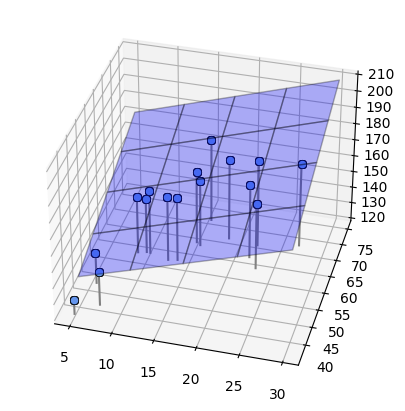

In [ ]:
plt.figure(figsize=(6, 5))
ax =plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse=mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()

# 이제 곡선 모델을 사용해서 오차를 줄여보자

13.333333333333334 5.0


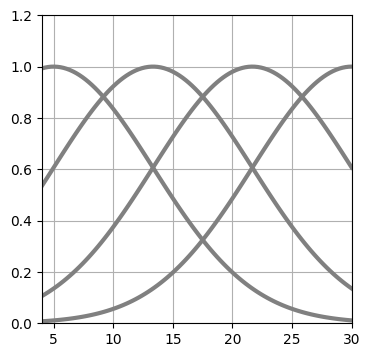

In [ ]:
outfile = np.load('/content/ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

def gauss(x, mu, s):
  return np.exp(-(x- mu)**2/ (2*s**2))



M= 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5 ,30, M)
s = mu[1] - mu[0] #mu에 있는 요소들의 간격들. 이 s를 이용하여 중심이 다른 여러 가우스 함수를 만듦
print(mu[1], mu[0])
xb =np.linspace(X_min, X_max, 100)
for j in range(M):
  y=gauss(xb, mu[j], s) # 여러가우스함수 생성
  plt.plot(xb, y, color='gray', linewidth=3) #그리기
plt.grid(True)#격자 생성
plt.xlim(X_min, X_max) # x범위
plt. ylim(0, 1.2) #y범위
plt. show()

#이 출력은 위 파일에서 가져온 데이터를 표현한 함수라기보단 그냥 기저함수들을 만든 것이다.
#이 여러 기저 함수들 앞에 계수를 붙여 더함으로써 곡선들을 표시할 것이다.

# **즉, [1, 2, 3, 4]라는 1차원 데이터 중에서 1이라는 데이터 하나를  [Φ0(1),Φ1(1),Φ2(1),Φ3(1)]이라는 4차원(M=4)데이터로 전처리 해준다.**

이후 이 M차원 데이터를 M차원의 w 벡터와 곱하여 y값을 구하고 실제값과 y의 MSE로 J를 구한다.

In [ ]:
def gauss_func(w,x):
  m= len(w) - 1
  mu=np.linspace(5, 30, m)
  s =mu[1] - mu[0]
  y=np. zeros_like(x)
  for j in range (m):
    y =y+w[j]*gauss(x,mu[j],s)

  y= y+w[m]
  return y

In [ ]:
def mse_gauss_func(x ,t, w) :
  y = gauss_func(w, x)
  mse = np.mean((y-t)**2)
  return mse

In [ ]:
def fit_gauss_func(x, t, m) :  #수치해가 아닌 해석해를 리턴하는 함수
  mu = np.linspace(5, 30, m)
  s= mu[1] - mu[0]
  n= x.shape[0]
  psi=np.ones((n, m+1))
  for j in range(m):
    psi[:, j] =gauss(x, mu[j], s)
  psi_T =np.transpose(psi)

  b= np.linalg.inv(psi_T.dot(psi))
  c=b.dot(psi_T)
  w=c.dot(t)
  return w

In [ ]:
def show_gauss_func(w):
  xb =np.linspace(X_min, X_max, 100)
  y = gauss_func(w, xb)
  plt.plot(xb, y, c=[.5, .5, .5], lw=4)

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


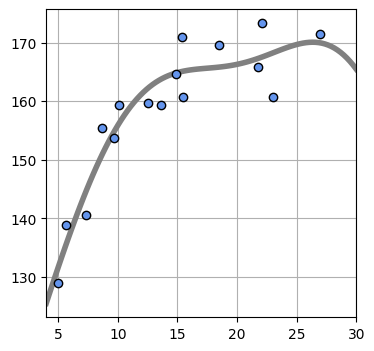

In [ ]:
plt.figure(figsize=(4, 4))
M= 4
W=fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W=' + str(np.round(W,1)))
print("SD={0:.2f} cm". format(np.sqrt (mse)))
plt.show()

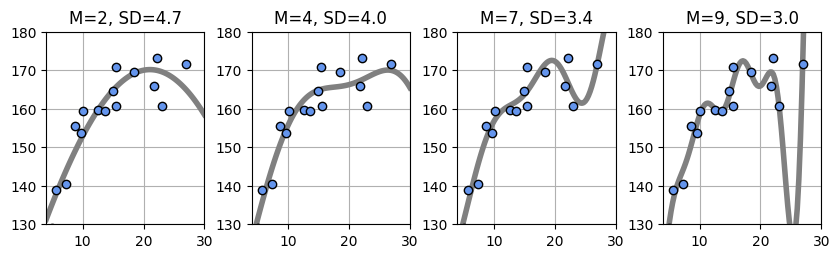

In [ ]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]

for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)


    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))

plt.show()

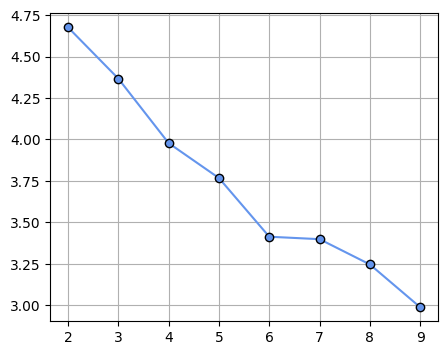

In [ ]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker="o", color="cornflowerblue", markeredgecolor="black")
plt.grid(True)
plt.show()

M이 커질 수록 SD의 값을 계속 작아진다. SD는 최적의 M의 기준은 되지 않는다.
자연 상에 존재하는 데이터들의 숨어있는 SD값들이 반영돼있지 않기 때문이다.

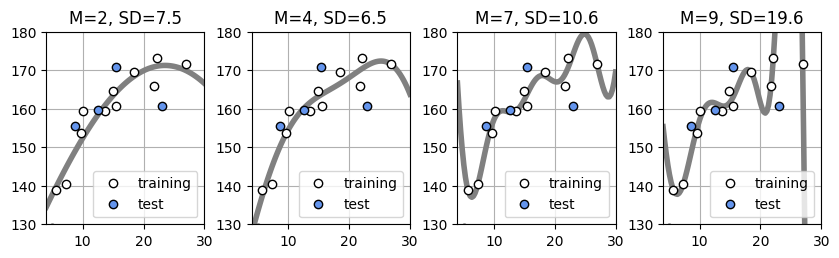

In [ ]:
# 훈련 데이터 : 테스트 데이터 = 3 : 1
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]

# 메인
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',
             linestyle='None', color='white',
             markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None',
             color='cornflowerblue',
             markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))

plt.show()

위 예시에서 train 셋으로 구한 SD값과 test 셋으로 구한 SD값이 정비례하지 않는다는 것을 알 수 있다. 즉 학습 단계에서 SD값이 작다고 좋은 M의 값을 의미하는 것은 아니다.

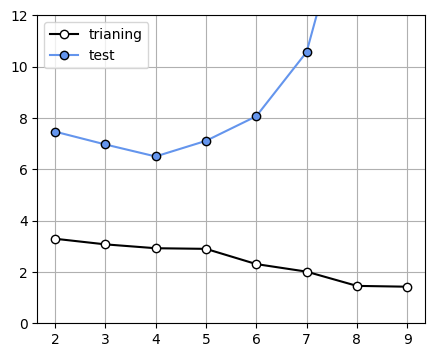

In [ ]:
plt.figure(figsize=(5, 4))
M = range(2, 10)

mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))

for i in range(len(M)):

    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))


plt.plot(M, mse_train, marker="o", linestyle="-", markerfacecolor="white", markeredgecolor="black", color="black", label="trianing")
plt.plot(M, mse_test, marker="o", linestyle="-", color="cornflowerblue", markeredgecolor="black", label="test")
plt.legend(loc="upper left", fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()

우리가 궁극적으로 목표로 하는 것은 자연상태에 존재하는 데이터들의 예측이기 때문에 test sd가 제일 낮은 M=4 가 최적이다.

In [ ]:
# K겹 교차 검증
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k): #잉여류를 사용하여 트레인셋과 데이터셋 골고루 분리
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_gauss_func(x_train, t_train, m) #해석해일 때의 W
        mse_train[i] = mse_gauss_func(x_train, t_train, wm) #각 iter, 즉 어떤 fold를 검증셋으로 쓰는 지, 그리고 그때마다의 최적해에 대한 최종mse값
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

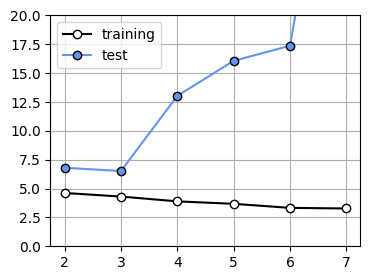

In [ ]:
np.fmod(range(10), 5)
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)): #cross validation
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] =\
                    kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

교차검증을 했을 떄 M=3일 떄가 최적이고, 이후부터는 오버피팅이 일어남을 알 수 있다.
교차검증은 어디까지나 M을 구하기 위한 방법이며, 모델 매개변수 w를 구하는 용도가 아닙니다.이제 M = 3이 최적임을 알고 있으므로, 그 모델의 매개변수 w를 모든 데이터를 사용해 마지막으로 계산합니다.

SD=4.37 cm


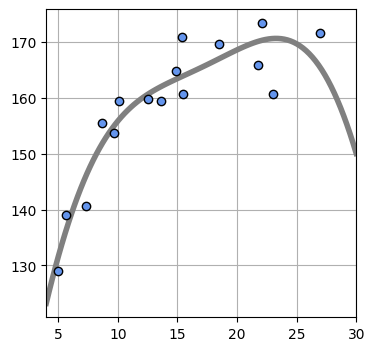

In [ ]:
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

키는 나이가 들면서 점차 커지고 일정한 곳에서 수렴한다' 는 지식을 모델에 추가

In [ ]:
# 모델 A
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y


# 모델 A 표시
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)


# 모델 A의 MSE
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t)**2)
    return mse

In [ ]:
from scipy.optimize import minimize

# 모델 A의 매개 변수 최적화
def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res1.x

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


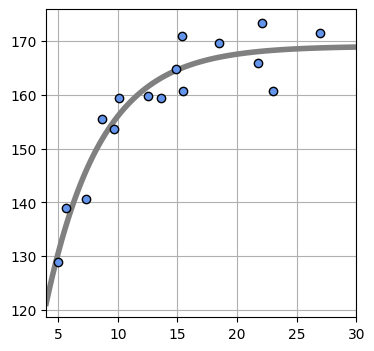

In [ ]:
# 메인
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


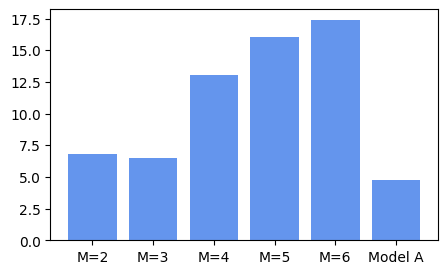

In [ ]:
# 교차 검증 model_A
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test


# 메인
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center",
facecolor="cornflowerblue")
plt.show()

A가 선형기저함수모델들보다 더 이 데이터에 잘 맞는다.(교차검증으로 검증)